##프로젝트 목표 
뉴욕의 airbnb 데이터를 활용하여 airbnb에 방을 내놓을 때 적당한 숙박료를 예측해본다.

In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [184]:
df = pd.read_csv('/content/drive/MyDrive/ddddd/project2/AB_NYC_2019.csv의 사본')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## 데이터 소개

    id: 항목의 ID
    name: 항목의 이름 (타이틀)
    host_id: 호스트 ID
    host_name: 호스트의 이름
    neighbourhood_group: 방이 있는 구역 그룹
    neighbourhood: 방이 있는 구역
    latitude: 방이 위치한 위도
    longitude: 방이 위치한 경도
    room_type: 방의 종류
    price: 가격 (미 달러)
    minimum_nights: 최소 숙박 일수
    number_of_reviews: 리뷰의 개수
    last_review: 마지막 리뷰 일자
    reviews_per_month: 월별 리뷰 개수
    calculated_host_listings_count: 호스트가 올린 방 개수
    availability_365: 365일 중 가능한 일수

In [185]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [186]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [187]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [188]:
df['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

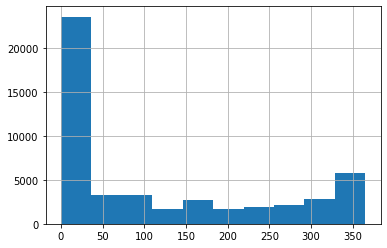

In [189]:
df['availability_365'].hist()

In [190]:
(df['availability_365'] == 0).sum()    #이용가능날이 0

17533

In [191]:
(df['number_of_reviews'] == 0).sum()

10052

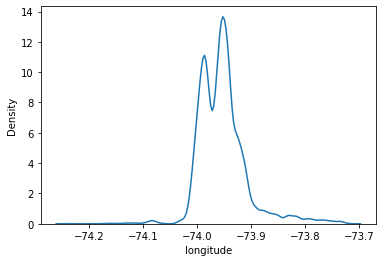

In [192]:
sns.kdeplot(df['longitude'])
plt.show()

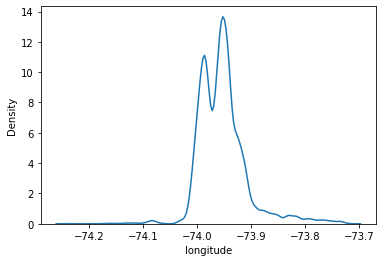

In [193]:
sns.kdeplot(df['longitude'])
plt.show()

In [194]:
df.drop(['id', 'name', 'host_name', 'latitude', 'longitude'], axis=1, inplace=True)  


In [195]:
df.head()

,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,Private room,149,1,9,2018-10-19,0.21,6,365
1,2845,Manhattan,Midtown,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,4632,Manhattan,Harlem,Private room,150,3,0,NaN,NaN,1,365
3,4869,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,7192,Manhattan,East Harlem,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


수치형 데이터

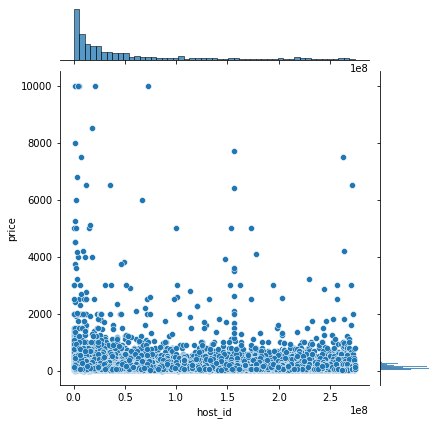

In [196]:
sns.jointplot(x='host_id', y='price', data=df)

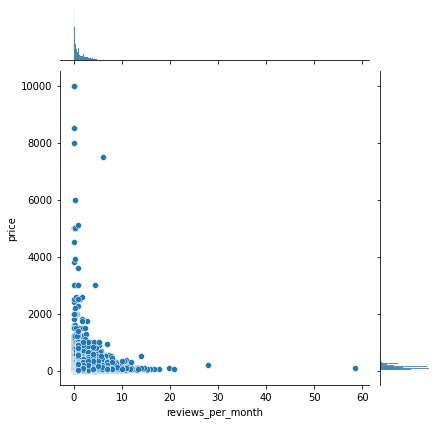

In [197]:
sns.jointplot(x='reviews_per_month', y='price', data=df)

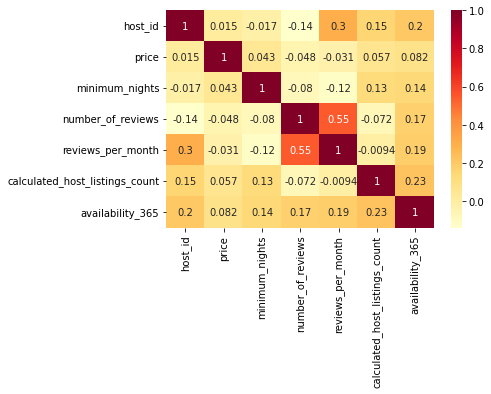

In [198]:
sns.heatmap(df.corr(), annot=True, cmap='YlOrRd')

In [199]:
df.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

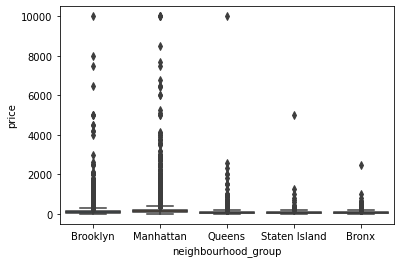

In [200]:
sns.boxplot(x='neighbourhood_group', y='price', data=df)

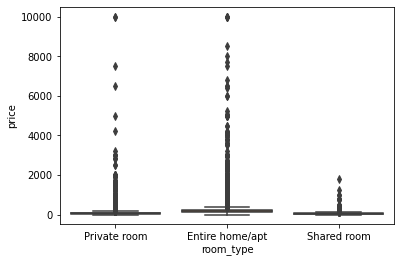

In [201]:
sns.boxplot(x='room_type', y='price', data=df)

data clean

In [202]:
df.isnull().sum()

host_id                               0
neighbourhood_group                   0
neighbourhood                         0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [203]:
df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [204]:
df['neighbourhood'].value_counts()

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64

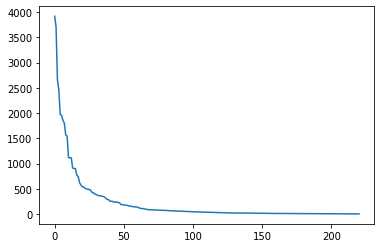

In [205]:
neigh = df['neighbourhood'].value_counts()
plt.plot(range(len(neigh)), neigh)

In [206]:
df['neighbourhood'] = df['neighbourhood'].apply(lambda s: s if str(s) not in neigh[50:] else 'others')

In [207]:
df['neighbourhood'].value_counts()

others                       6248
Williamsburg                 3920
Bedford-Stuyvesant           3714
Harlem                       2658
Bushwick                     2465
Upper West Side              1971
Hell's Kitchen               1958
East Village                 1853
Upper East Side              1798
Crown Heights                1564
Midtown                      1545
East Harlem                  1117
Greenpoint                   1115
Chelsea                      1113
Lower East Side               911
Astoria                       900
Washington Heights            899
West Village                  768
Financial District            744
Flatbush                      621
Clinton Hill                  572
Long Island City              537
Prospect-Lefferts Gardens     535
Park Slope                    506
East Flatbush                 500
Fort Greene                   489
Murray Hill                   485
Kips Bay                      470
Flushing                      426
Ridgewood     

In [208]:
df['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

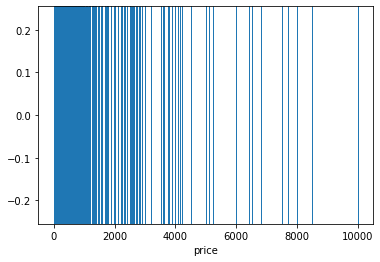

In [209]:
sns.rugplot(x='price', data=df, height=1)

In [210]:
print(df['price'].quantile(0.95))
print(df['price'].quantile(0.005))

355.0
26.0


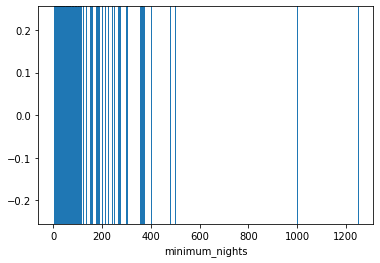

In [211]:
sns.rugplot(x='minimum_nights', data=df, height=1)

In [212]:
print(df['minimum_nights'].quantile(0.98))

30.0


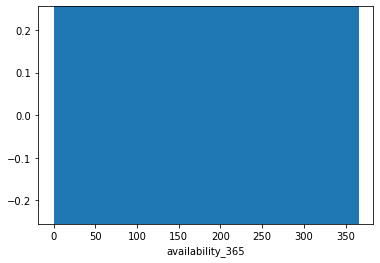

In [213]:
sns.rugplot(x='availability_365', data=df, height=1)

In [214]:
print(df['availability_365'].quantile(0.3))

0.0


In [215]:
print(df['availability_365'].quantile(0.98))

365.0


outlier 제거

In [216]:
# quantile(), drop() 등 메소드를 이용하여 outlier 제거하고 통계 재분석하기
p1 = df['price'].quantile(0.95)
p2 = df['price'].quantile(0.005)
print(p1, p2)

355.0 26.0


In [217]:
df = df[(df['price'] < p1) & (df['price'] > p2)]

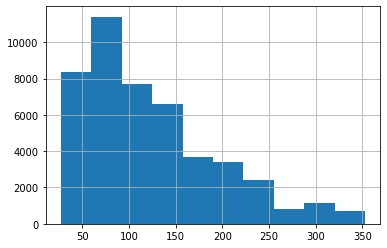

In [218]:
df['price'].hist()

In [219]:
mn1 = df['minimum_nights'].quantile(0.98)
print(mn1)

30.0


In [220]:
df = df[df['minimum_nights'] < mn1]

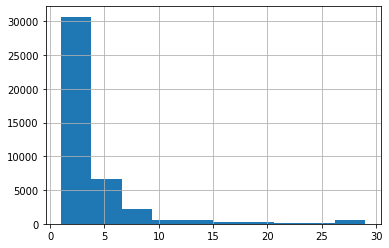

In [221]:
df['minimum_nights'].hist()

feature enginering

In [222]:
df['is_avail_zero'] = df['availability_365'].apply(lambda x: 'Zero' if x==0 else 'Nonzero')
df['is_avail_zero']

0        Nonzero
1        Nonzero
2        Nonzero
3        Nonzero
4           Zero
          ...   
48890    Nonzero
48891    Nonzero
48892    Nonzero
48893    Nonzero
48894    Nonzero
Name: is_avail_zero, Length: 41980, dtype: object

In [223]:
# fill(), dropna() 등으로 미기입된 데이터를 처리하기
df['review_exists'] = df['reviews_per_month'].isna().apply(lambda x: 'No' if x is True else 'Yes')

In [224]:
df.fillna(0, inplace=True)

In [225]:
df.isna().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
is_avail_zero                     0
review_exists                     0
dtype: int64

범주형

In [226]:
X_cat = df[['neighbourhood_group', 'neighbourhood', 'room_type', 'is_avail_zero', 'review_exists']]
X_cat = pd.get_dummies(X_cat)
X_cat

,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,neighbourhood_Astoria,neighbourhood_Bedford-Stuyvesant,neighbourhood_Bushwick,neighbourhood_Carroll Gardens,neighbourhood_Chelsea,...,neighbourhood_Williamsburg,neighbourhood_Woodside,neighbourhood_others,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,is_avail_zero_Nonzero,is_avail_zero_Zero,review_exists_No,review_exists_Yes
0,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,1
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,1,0
48891,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,1,0
48892,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
48893,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0


스케일링

In [227]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_num = df.drop(['neighbourhood_group', 'neighbourhood', 'room_type', 'price', 
                 'last_review', 'is_avail_zero', 'review_exists'], axis=1)

scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index=X_num.index, columns=X_num.columns)

X = pd.concat([X_scaled, X_cat], axis=1)
y = df['price']

In [228]:
X.head()

,host_id,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,...,neighbourhood_Williamsburg,neighbourhood_Woodside,neighbourhood_others,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,is_avail_zero_Nonzero,is_avail_zero_Zero,review_exists_No,review_exists_Yes
0,-0.848227,-0.588004,-0.352358,-0.588299,0.066069,2.132586,0,1,0,0,...,0,0,1,0,1,0,1,0,0,1
1,-0.848227,-0.588004,0.419649,-0.485721,-0.084134,2.052616,0,0,1,0,...,0,0,0,1,0,0,1,0,0,1
2,-0.848204,-0.119342,-0.545360,-0.715013,-0.121684,2.132586,0,0,1,0,...,0,0,0,0,1,0,1,0,1,0
3,-0.848200,-0.588004,5.244692,2.084766,-0.121684,0.765095,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
4,-0.848170,1.520973,-0.352358,-0.654673,-0.121684,-0.786327,0,0,1,0,...,0,0,0,1,0,0,0,1,0,1


train test valid

In [229]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


In [230]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=2)

basemodel

In [231]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
import math 
y_target = df['price']
mean = y_target.mean()
baseline = [mean] * len(df)

mae = mean_absolute_error(y_target, baseline)
mse = mean_squared_error(y_target, baseline)
rmse = math.sqrt(mse)

In [232]:
print(mae)
print(mse)
print(rmse)

56.533858809101915
4996.4323042478545
70.68544619826527


모델학습 및 평가

In [233]:
from xgboost import XGBRegressor
model_reg = XGBRegressor(objective='reg:squarederror')
model_reg.fit(X_train, y_train)

XGBRegressor(objective='reg:squarederror')

In [234]:
pred = model_reg.predict(X_valid)
print(mean_absolute_error(y_valid, pred))
print(mean_squared_error(y_valid, pred))
print(math.sqrt(mean_squared_error(y_valid, pred)))

35.41616772675383
2429.380191463937
49.288743050152306


하이퍼 파라미터 튜닝

In [235]:
import numpy as np
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [236]:
max_depth = [0,5,10]
learning_rate = [0.1,0.2]
gamma = [0.1,1,10]

In [237]:
model_reg = XGBRegressor(objective='reg:squarederror')
model_reg.fit(X_train, y_train)

XGBRegressor(objective='reg:squarederror')

In [238]:
print(model_reg.get_params().keys())
parameters = {'max_depth':max_depth, 'learning_rate':learning_rate ,'gamma':gamma } 
 
## Grid Search 수행
reg = GridSearchCV(model_reg, parameters, cv=3)
reg.fit(X_train, y_train)

dict_keys(['base_score', 'booster', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'gamma', 'importance_type', 'learning_rate', 'max_delta_step', 'max_depth', 'min_child_weight', 'missing', 'n_estimators', 'n_jobs', 'nthread', 'objective', 'random_state', 'reg_alpha', 'reg_lambda', 'scale_pos_weight', 'seed', 'silent', 'subsample', 'verbosity'])


GridSearchCV(cv=3, estimator=XGBRegressor(objective='reg:squarederror'),
             param_grid={'gamma': [0.1, 1, 10], 'learning_rate': [0.1, 0.2],
                         'max_depth': [0, 5, 10]})

In [239]:
print('최적 파라미터 값 : ', reg.best_params_)
print('점수 : ', reg.best_score_)

최적 파라미터 값 :  {'gamma': 10, 'learning_rate': 0.2, 'max_depth': 5}
점수 :  0.537994381402044


In [240]:
final_reg = XGBRegressor(objective='reg:squarederror', gamma = 10, learning_rate=0.2, max_depth = 5)
final_reg.fit(X_train, y_train)

XGBRegressor(gamma=10, learning_rate=0.2, max_depth=5,
             objective='reg:squarederror')

In [241]:
pred = final_reg.predict(X_test)
print(mean_absolute_error(y_test, pred))
print(mean_squared_error(y_test, pred))
print(math.sqrt(mean_squared_error(y_test, pred)))

34.84206262027837
2385.931281710677
48.84599555450454


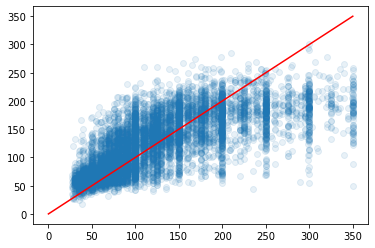

In [242]:
plt.scatter(x=y_test, y=pred, alpha=0.1)
plt.plot([0,350], [0, 350], 'r-')

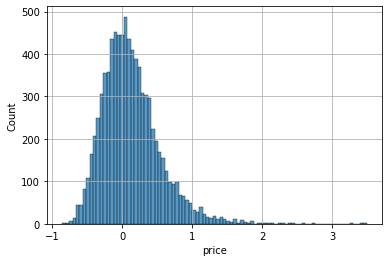

In [243]:
err = (pred - y_test) / y_test
sns.histplot(err)
plt.grid()